# KC_HOUSE PREDICTION PROJECT

This is a project for a real estate agency that helps homeowners buy and/or sell homes. The business problem is focusing on how this stakeholder is to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

## Column Names and descriptions for Kings County Data Set

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo. The description of the column names can be found in column_names.md in the same folder.

id- unique identified for a house

Date- house was sold

Price-  is prediction target

bedroomsNumber -  of Bedrooms/House

bathroomsNumber-  of bathrooms/bedrooms

sqft_livingsquare-  footage of the home

sqft_lotsquare-  footage of the lot

floorsTotal-  floors (levels) in house

waterfront- House which has a view to a waterfront

view- Has been viewed

condition- How good the condition is ( Overall )

grade- overall grade given to the housing unit, based on King County grading system

sqft_above- square footage of house apart from basement

sqft_basement- square footage of the basement

yr_built- Built Year

yr_renovated- Year when house was renovated

zipcode- zip

lat- Latitude coordinate

long- Longitude coordinate

sqft_living15- The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15- The square footage of the land lots of the nearest 15 neighbors

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Data understanding

In [2]:
#viewing the data
df = pd.read_csv('kc_house_data.csv', encoding='latin1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Checking datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Checking the number of different values
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

The waterfront column is binary

In [5]:
#separate numerical data from the data set
numerical_data = df.select_dtypes(include = 'number').describe()
#descriptive statistics for quantitative variables
numerical_data.drop(['id','waterfront','zipcode'],axis =1).describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,8.000000e+00,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1.265533e+06,2705.662437,2701.860601,5549.428497,2.191664e+05,2701.004222,2692.374944,2702.132546,2705.478889,4869.169575,4179.421864,2531.697899,2735.294131,2608.051093,4570.981349,119535.465683
std,2.608586e+06,7633.260597,7634.789613,7754.222939,5.788317e+05,7635.135339,7613.166320,7634.679511,7633.328060,7349.081333,7070.470127,6189.752456,7621.298120,7672.813309,7107.282454,303841.801891
min,2.159700e+04,0.926299,0.500000,370.000000,5.200000e+02,0.539683,0.000000,0.650546,1.173200,370.000000,29.375234,0.000000,0.138552,-122.519000,399.000000,651.000000
25%,2.610000e+05,2.500000,1.504746,1302.026531,6.973500e+03,1.000000,0.000000,2.500000,6.000000,1099.439940,1938.250000,0.000000,47.392300,-122.255250,1288.807618,6990.000000
50%,4.086841e+05,3.186600,2.182913,1995.160925,1.289220e+04,1.497048,0.116931,3.204913,7.328958,1674.298421,1972.999838,41.818389,47.565946,-122.169491,1913.310159,11420.641756
75%,5.664724e+05,11.250000,3.875000,5297.500000,2.655091e+04,2.375000,1.574265,4.250000,9.250000,4010.000000,2001.500000,803.709810,47.702900,-90.951069,3322.500000,23016.360488
max,7.700000e+06,21597.000000,21597.000000,21597.000000,1.651359e+06,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,871200.000000


In [6]:
#Checking the number of different values
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [7]:
#Checking datatpyes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Date and sqft_basement have datatype object

### Data cleaning

In [8]:
#Checking for null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
#Checking fo null and missing values
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [10]:
#Checking fo null and missing values
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
#Checking fo null and missing values
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1930.0        1
1024.0        1
248.0         1
508.0         1
3480.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [12]:
#Replace a single value with a new value for an individual DataFrame column
df["sqft_basement"] = df["sqft_basement"].replace(['?'],'0.0')

#converting the sqft_basment column from str to float
df["sqft_basement"] = df["sqft_basement"].astype("float")

In [13]:
#Checking fo null and missing values
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [14]:
#filling missing values
df['view'] = df.view.fillna(value = df.view.median())
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [15]:
#filling missing values
df.waterfront = df['waterfront'].fillna(value = df.waterfront.median())


In [16]:
#viewing dataframe
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [17]:
#filling missing values
df.yr_renovated = df.yr_renovated.fillna(value = df.yr_renovated.median())

In [18]:
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [19]:
#Checking for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Majority of the houses have not been viewed

## Data visualization 

[Text(0.5, 1.0, 'Grade effect on price')]

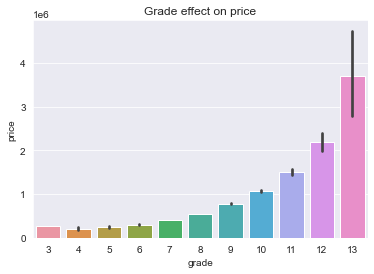

In [21]:
#viewing how grade affect price
#fig, ax = plt.subplots(figsize = (8,6))
#ax.scatter(x = df['sqft_living'], y = df['price'])
sns.barplot(y='price',x ='grade',data=df).set(title = 'Grade effect on price')


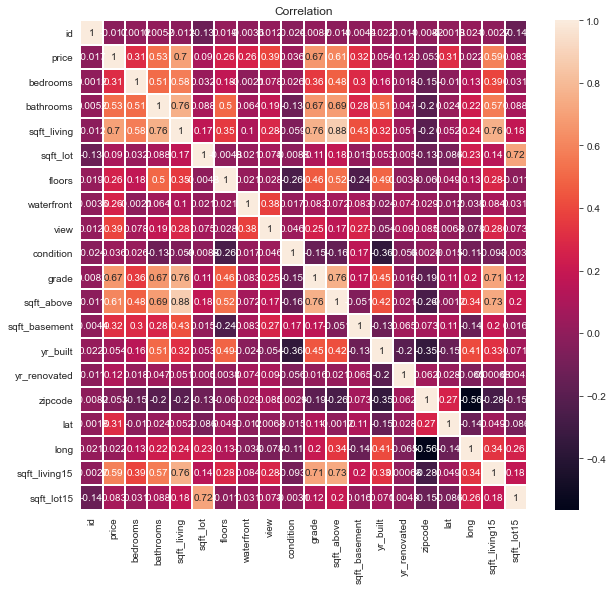

In [22]:
#Checking for columns that correlate with price
fig , ax = plt.subplots(figsize=(10,9))
ax = sns.heatmap(df.corr(),annot=True, linewidths = 1).set(title = ('Correlation'))

In [23]:
#list of column index and column names
list(enumerate(df))
df_l =  [df['grade'],df['bedrooms'],df['floors'],df['view'],df['condition'],df['bathrooms'],df['sqft_living'],df['sqft_living15']]

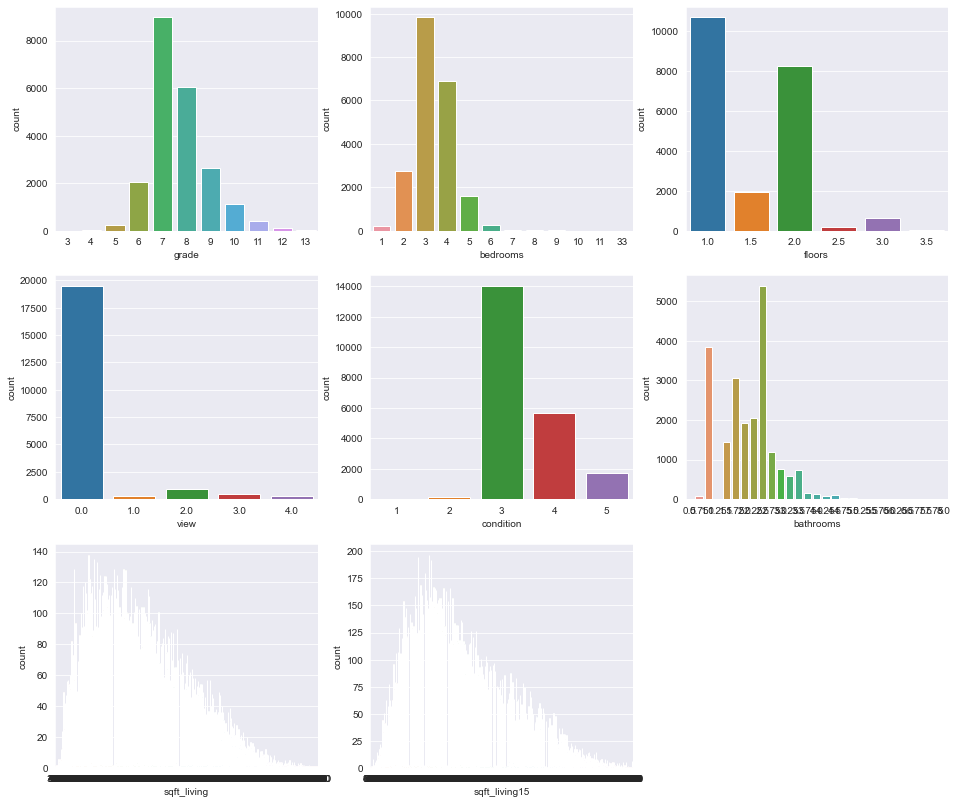

In [24]:
#univariate analysis
sns.set_style('darkgrid')
plt.figure(figsize=(16,14))
for i in enumerate(df_l):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(i[1])

In [25]:
df_b = [df['grade'],df['bedrooms'],df['floors'],df['view'],df['condition'],df['bathrooms'],df['sqft_living'],df['sqft_living15']]

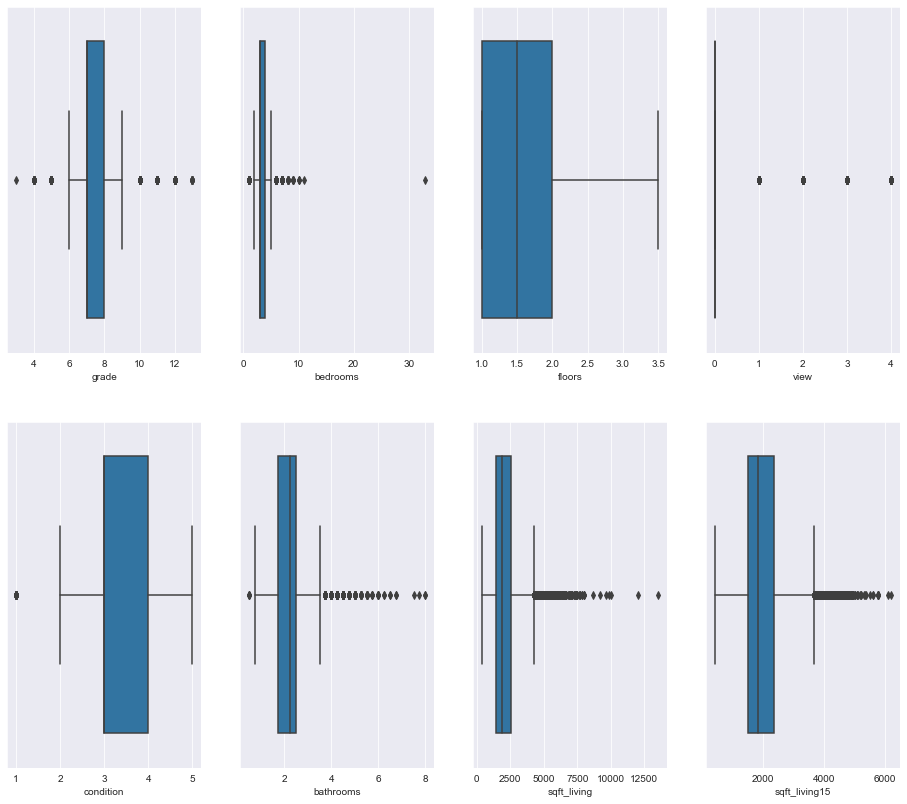

In [26]:
#Checking for outliers
sns.set_style('darkgrid')
plt.figure(figsize=(16,14))
for i in enumerate(df_l):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(i[1])
#sns.boxplot(data = df,x = 'bedrooms',y = 'price')

In [27]:
#Droping outliers 
df.drop(df.loc[df['bedrooms'] >=11].index, inplace=True)

In [28]:
df_s = [df['grade'],df['bedrooms'],df['floors'],df['view'],df['condition'],df['bathrooms'],df['sqft_living'],df['sqft_living15']]

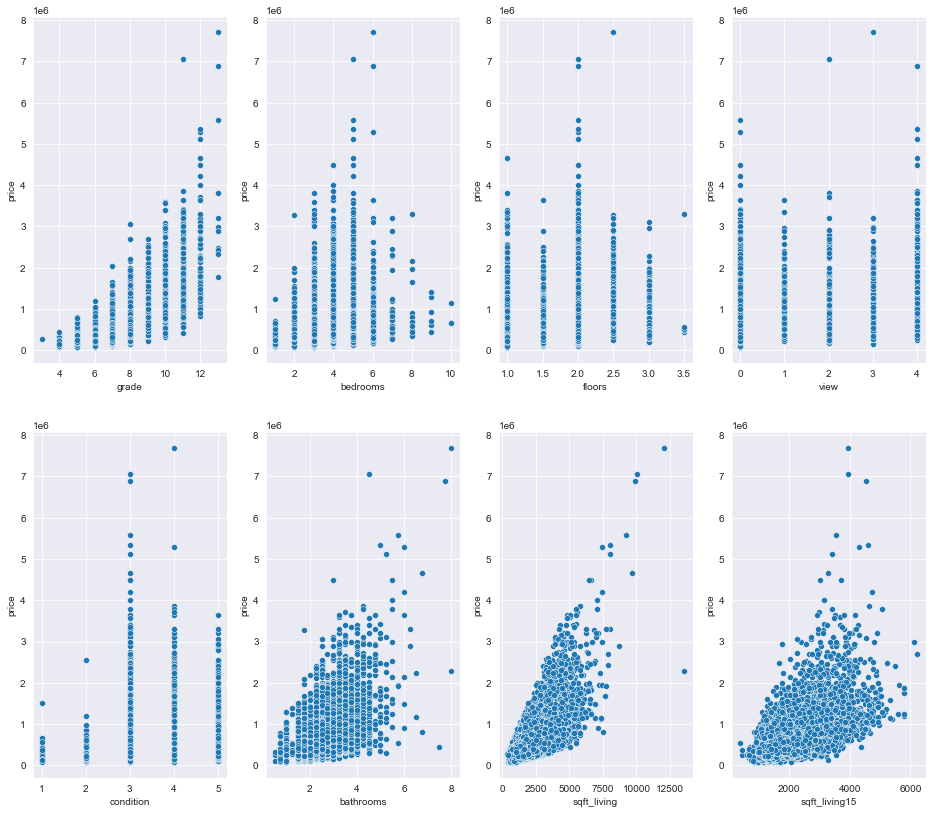

In [29]:
#Scatter plot on how different values affect price
sns.set_style('darkgrid')
plt.figure(figsize=(16,14))
for i in enumerate(df_s):
    plt.subplot(2,4,i[0]+1)
    sns.scatterplot(i[1],df['price'])

<AxesSubplot:xlabel='long', ylabel='lat'>

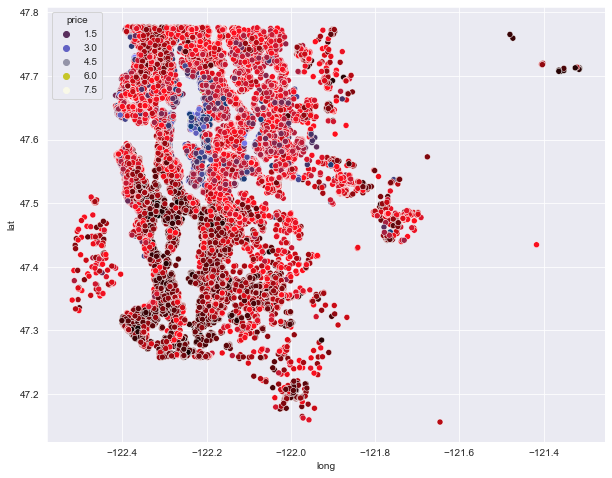

In [30]:
#Ploting a map showing different house pricess
plt.figure(figsize=(10,8))
sns.scatterplot(data = df,x = df['long'], y = df['lat'], hue = df['price'], palette ='gist_stern')
#gist_stern

Text(0.5, 1.0, 'Relationship between sqft_basement and price')

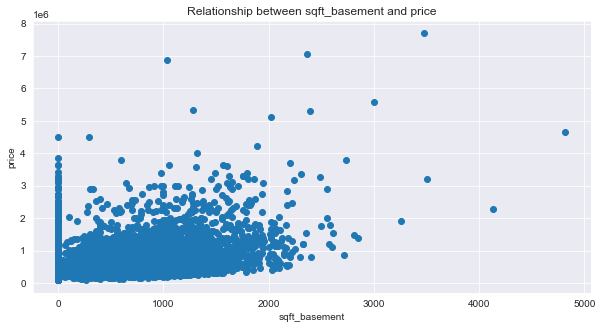

In [31]:
#The relationship between year built and price
fig, ax = plt.subplots(figsize= (10,5))
ax.scatter(x = df['sqft_basement'],y= df['price'])
plt.xlabel("sqft_basement")
plt.ylabel("price")
plt.title("Relationship between sqft_basement and price") 

<AxesSubplot:>

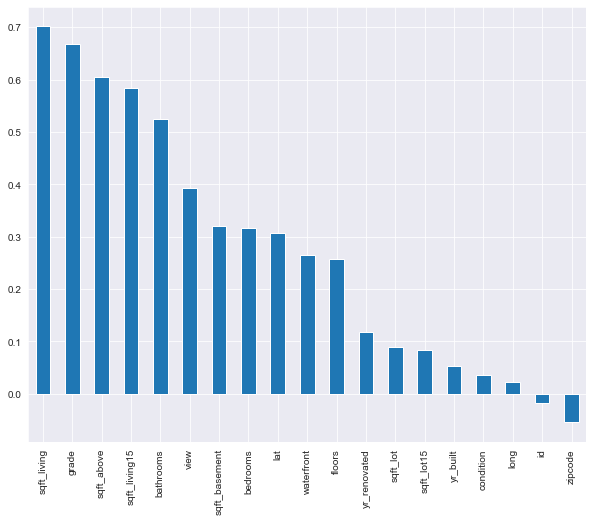

In [32]:
#What affects price the most
plt.figure(figsize = (10,8))
df.corr()['price'].sort_values(ascending=False).drop('price').plot(kind = 'bar')

<AxesSubplot:xlabel='price', ylabel='Density'>

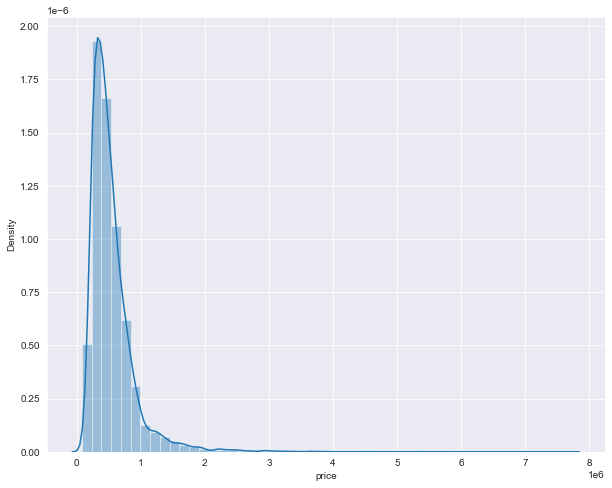

In [33]:
#What price range for most house
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))

sns.distplot(df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

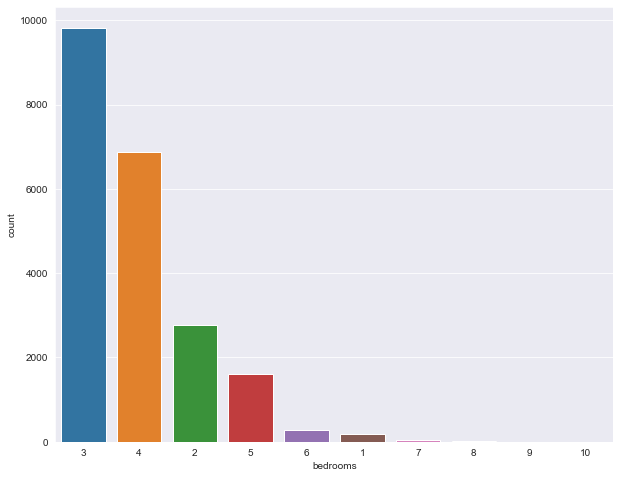

In [34]:
#How many bedrooms do most houses have?
plt.figure(figsize = (10,8))
sns.countplot(df.bedrooms, order = df['bedrooms'].value_counts().index)

In [35]:
#converting date
df['date'] = pd.to_datetime(df['date'])

In [36]:
#Create a new month column
df['months'] = df['date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21595 non-null  int64         
 1   date           21595 non-null  datetime64[ns]
 2   price          21595 non-null  float64       
 3   bedrooms       21595 non-null  int64         
 4   bathrooms      21595 non-null  float64       
 5   sqft_living    21595 non-null  int64         
 6   sqft_lot       21595 non-null  int64         
 7   floors         21595 non-null  float64       
 8   waterfront     21595 non-null  float64       
 9   view           21595 non-null  float64       
 10  condition      21595 non-null  int64         
 11  grade          21595 non-null  int64         
 12  sqft_above     21595 non-null  int64         
 13  sqft_basement  21595 non-null  float64       
 14  yr_built       21595 non-null  int64         
 15  yr_renovated   2159

[]

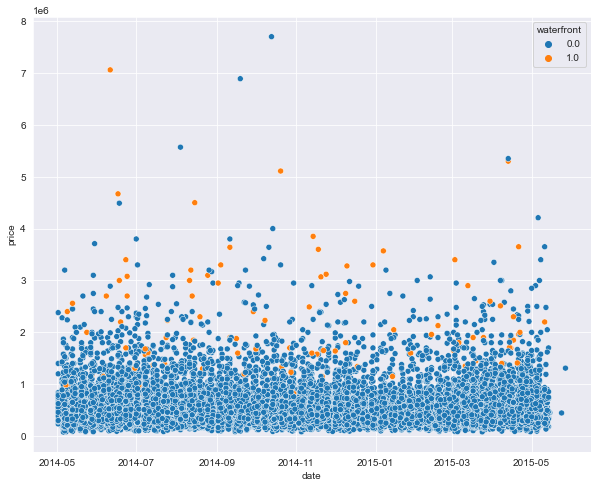

In [37]:
#waterfront effect on size
plt.figure(figsize=(10,8))
sns.scatterplot(data = df, x = df.date, y = df.price, hue = 'waterfront').plot(title = 'How waterfront affects price')

houses with a waterfront have high prices compared to those without

[Text(0.5, 1.0, 'Number of times a house is viewed depending on date sold and price')]

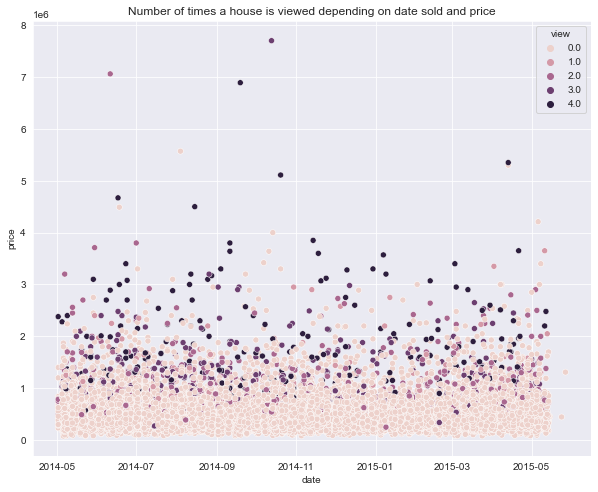

In [38]:
#Prices of houses sold on different dates 
plt.figure(figsize=(10,8))
sns.scatterplot(data = df, x = df.date, y = df.price, hue = 'view').set(title="Number of times a house is viewed depending on date sold and price")

low priced housed do not get a lot of views as compared to expensive houses

## Categorical data

In [39]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,months
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2


In [40]:
#Spliting data into categorical and numerical data
#Numerical data
num_df = df[['price','bathrooms','bedrooms','sqft_living','sqft_above','lat','long','sqft_living15','sqft_lot15']]
#Categorical data
cat_df = df[['condition','grade','yr_built','view','yr_renovated','zipcode']]


In [41]:
#Viewing categorical data
cat_df.view.value_counts()

0.0    19483
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [42]:
#Changing the column to viewed and not viewed
bins =[0,1,4]
bin_views = pd.cut(cat_df['view'], bins,include_lowest = True, labels = ['no_views', 'viewed'] )
bin_views = bin_views.cat.as_unordered()

<AxesSubplot:title={'center':'Viewed vs not viewed'}>

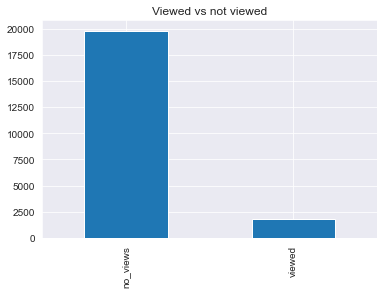

In [43]:
bin_views.value_counts().plot(kind='bar', title = 'Viewed vs not viewed')

In [44]:
bin_views.value_counts()

no_views    19813
viewed       1782
Name: view, dtype: int64

## Checking on year of renovation

In [45]:
df.yr_renovated.value_counts()

0.0       20852
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1934.0        1
1971.0        1
1954.0        1
1950.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [46]:
df.yr_renovated.isnull().value_counts()

False    21595
Name: yr_renovated, dtype: int64

In [47]:
renovated = (df['yr_renovated'] != 0)
df['renovated'] = renovated

## Price vs other variables

In [48]:
df_p = [df['grade'],df['view'],df['condition'],df['bedrooms'],df['floors'],df['renovated']]

In [49]:
enumerate(df_p)

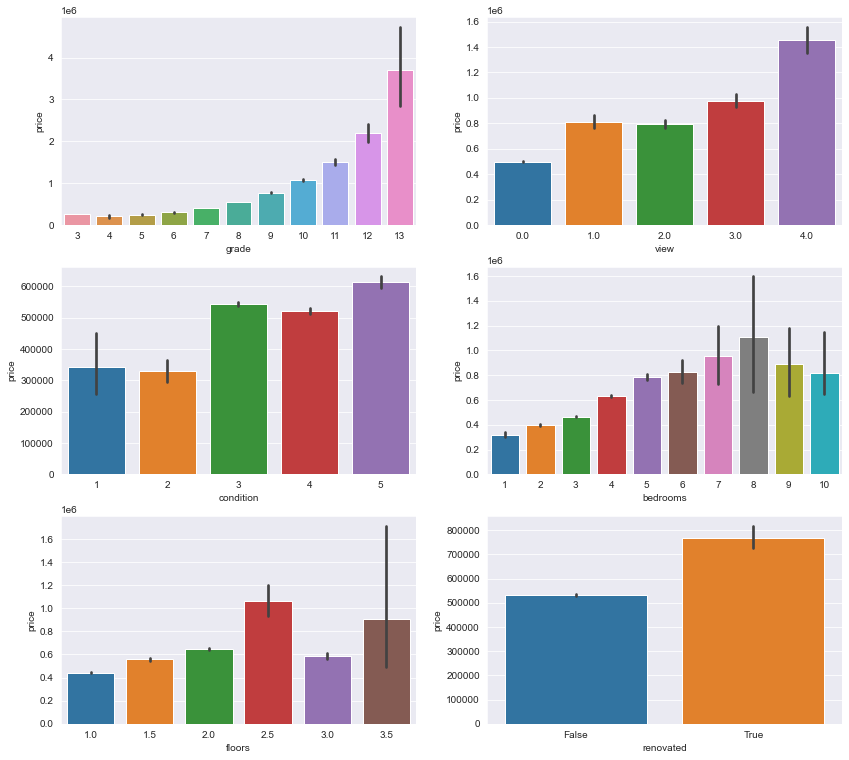

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,13))
for i in enumerate(df_p):
    plt.subplot(3,2,i[0]+1)
    sns.barplot(i[1],df['price'])

In [51]:
#viewing year of renovation
ren_year = df.loc[df['renovated'] == True]
ren_year.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,months,renovated
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,True
35,9547205180,2014-06-13,696000.0,3,2.50,2300,3060,1.5,0.0,0.0,...,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264,6,True
95,1483300570,2014-09-08,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,...,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045,9,True
103,2450000295,2014-10-07,1090000.0,3,2.50,2920,8113,2.0,0.0,0.0,...,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113,10,True
125,4389200955,2015-03-02,1450000.0,4,2.75,2750,17789,1.5,0.0,0.0,...,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275,3,True


In [52]:
ren_year['yr_renovated'].describe()

count     743.000000
mean     1995.924630
std        15.610047
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.500000
max      2015.000000
Name: yr_renovated, dtype: float64

[Text(0.5, 1.0, 'Renovated house prices')]

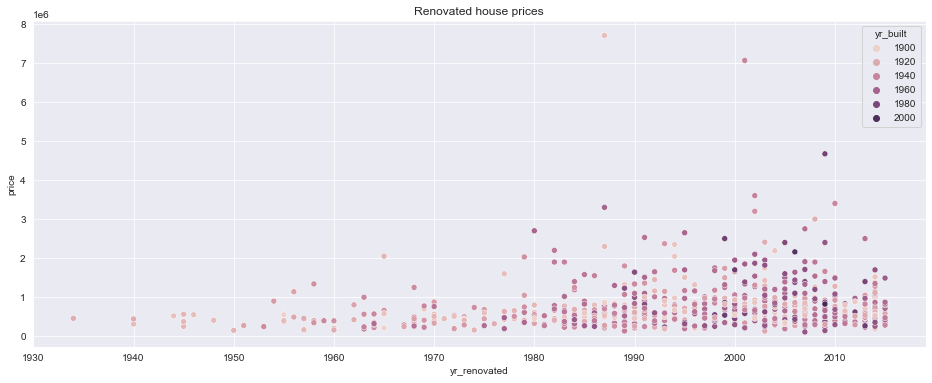

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,6))
sns.scatterplot(y = df['price'],x = ren_year['yr_renovated'], hue = df['yr_built']).set(title = "Renovated house prices")

[Text(0.5, 1.0, 'Prices of renovated and non-renovated houses')]

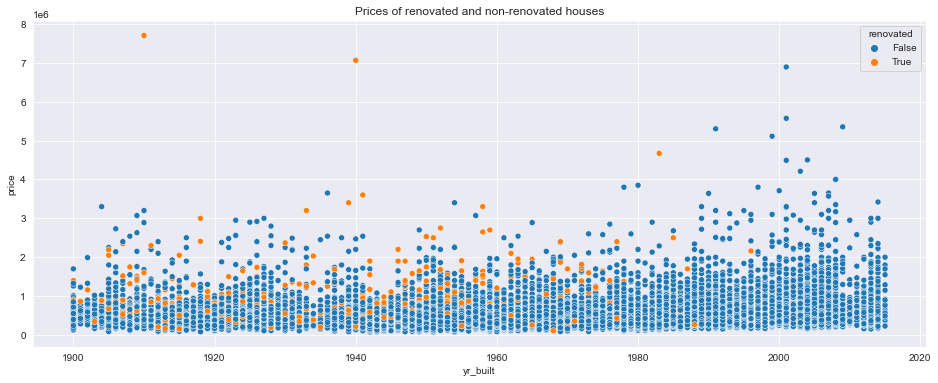

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,6))
sns.scatterplot(y = df['price'],x = df['yr_built'], hue = df['renovated']).set(title='Prices of renovated and non-renovated houses')

In [55]:
renovated.value_counts()

False    20852
True       743
Name: yr_renovated, dtype: int64

<AxesSubplot:title={'center':'Renovated and Non-Renovated'}>

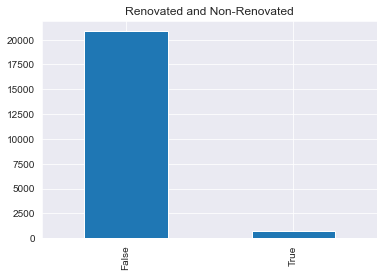

In [56]:
#Comparison between renovated and non-renovated houses
df.renovated.value_counts().plot(kind='bar',title="Renovated and Non-Renovated")

## converting categorical to numerical

In [57]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,months,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,False
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,True
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,False
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,False
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,False


In [58]:
def binary_convert(x):
    if x > 0:
        return 1
    else:
        return 0 
    return x

In [59]:
#Using the function binary convert
df['bin_view'] = df['view'].apply(binary_convert)
df['bin_view'].value_counts()

0    19483
1     2112
Name: bin_view, dtype: int64

In [60]:
def binary_condition(x):
    if x < 2:
        return 0
    else:
        return 1 
        
    return x

In [61]:
df['bin_condition'] = df['condition'].apply(binary_condition)
df['bin_condition'].value_counts()

1    21566
0       29
Name: bin_condition, dtype: int64

In [62]:
def binary_floors(x):
    if x < 1.5:
        return 0
    else:
        return 1 
        
    return x

In [63]:
#Apply the function
df['bin_floors'] = df['floors'].apply(binary_floors)
df['bin_floors'].value_counts()

1    10923
0    10672
Name: bin_floors, dtype: int64

In [64]:
df['renovated'] = df['yr_renovated'].apply(binary_convert)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,months,renovated,bin_view,bin_condition,bin_floors
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,10,0,0,1,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,12,1,0,1,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,2,0,0,1,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,12,0,0,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,98103,47.6993,-122.346,1530,1509,5,0,0,1,1
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,98146,47.5107,-122.362,1830,7200,2,0,0,1,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,98144,47.5944,-122.299,1020,2007,6,0,0,1,1
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,98027,47.5345,-122.069,1410,1287,1,0,0,1,1


In [65]:
# dropping columns
df.drop(["id", "zipcode","date", "sqft_living",'floors','view',
                     'condition',"grade","yr_built", "yr_renovated",
                  "months"], axis = 1, inplace = True)

In [66]:
df

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [67]:
#Creating a function to remove outliers
def no_outliers(data, col):
    #first and third quartile
    first_q, third_q = np.percentile(data[col], 25), np.percentile(data[col], 75)
    #interquartile range
    iq_range = third_q - first_q
    #get the cut_off for values(iqr*1.5)
    cut_off = iq_range * 1.5
    #lower and upper values
    lower_range, upper_range = first_q - cut_off, third_q + cut_off

    return data[(data[col] >= lower_range) & (data[col] <= upper_range)]

In [68]:
new_df = df[['price','bedrooms','bathrooms','sqft_lot' ,'waterfront','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15','renovated','bin_view','bin_condition','bin_floors']]

In [69]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21595 non-null  float64
 1   bedrooms       21595 non-null  int64  
 2   bathrooms      21595 non-null  float64
 3   sqft_lot       21595 non-null  int64  
 4   waterfront     21595 non-null  float64
 5   sqft_above     21595 non-null  int64  
 6   sqft_basement  21595 non-null  float64
 7   lat            21595 non-null  float64
 8   long           21595 non-null  float64
 9   sqft_living15  21595 non-null  int64  
 10  sqft_lot15     21595 non-null  int64  
 11  renovated      21595 non-null  int64  
 12  bin_view       21595 non-null  int64  
 13  bin_condition  21595 non-null  int64  
 14  bin_floors     21595 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 3.3 MB


In [70]:
new_df1 = no_outliers(new_df, 'bathrooms')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [71]:
new_df1 = no_outliers(new_df1, 'bedrooms')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [72]:
new_df1 = no_outliers(new_df1, 'sqft_lot')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [73]:
new_df1 = no_outliers(new_df1, 'waterfront')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [74]:
new_df1 = no_outliers(new_df1, 'sqft_above')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [75]:
new_df['sqft_basement'].astype(int)

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21595, dtype: int32

In [76]:
new_df1 = no_outliers(new_df1, 'sqft_basement')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [77]:
new_df1 = no_outliers(new_df1, 'long')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [78]:
new_df1 = no_outliers(new_df1, 'lat')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [79]:
new_df1 = no_outliers(new_df1, 'bin_floors')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [80]:
new_df1 = no_outliers(new_df1, 'bin_condition')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [81]:
new_df1 = no_outliers(new_df1, 'renovated')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
6,257500.0,3,2.25,6819,0.0,1715,0.0,47.3097,-122.327,2238,6819,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [82]:
new_df1 = no_outliers(new_df1, 'sqft_lot15')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
6,257500.0,3,2.25,6819,0.0,1715,0.0,47.3097,-122.327,2238,6819,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


In [83]:
new_df1 = no_outliers(new_df1, 'sqft_living15')
new_df1

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,bin_view,bin_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0
6,257500.0,3,2.25,6819,0.0,1715,0.0,47.3097,-122.327,2238,6819,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,0.0,1530,0.0,47.6993,-122.346,1530,1509,0,0,1,1
21593,400000.0,4,2.50,5813,0.0,2310,0.0,47.5107,-122.362,1830,7200,0,0,1,1
21594,402101.0,2,0.75,1350,0.0,1020,0.0,47.5944,-122.299,1020,2007,0,0,1,1
21595,400000.0,3,2.50,2388,0.0,1600,0.0,47.5345,-122.069,1410,1287,0,0,1,1


### Model 1 

Use independent variables for predicting

In [84]:
x_m = new_df.drop(columns = ['price','bin_view','renovated','bin_condition','bin_floors'])
y_m = new_df["price"]

In [85]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
xm_train, xm_test, ym_train, ym_test = train_test_split(x_m,y_m, random_state = 50)

In [86]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
xm_train = sc.fit_transform(xm_train)
xm_test = sc.transform(xm_test)

In [87]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(xm_train,ym_train)

LinearRegression()

In [88]:
print("Intercept :" + str(OLS.intercept_))
print('the set of coefficients :' + str(OLS.coef_))
print("The R-squared values :" + str(OLS.score(xm_train,ym_train)))

Intercept :541232.6626327435
the set of coefficients :[-39708.68252138  15253.48001747  12153.10650835  71091.77847203
 205418.46818256  99284.48839165  92155.64827024 -52840.00403192
  59775.03639422 -12800.57407976]
The R-squared values :0.6351399364223859


In [89]:
#predicting with OLS
ym_pred = OLS.predict(xm_test)
performance_m = pd.DataFrame({'PREDICTIONS' : ym_pred, 'ACTUAL VALUES':ym_test})
performance_m['error'] = performance_m['ACTUAL VALUES'] - performance_m['PREDICTIONS']
performance_m

,PREDICTIONS,ACTUAL VALUES,error
3879,503579.130896,589950.0,86370.869104
6668,555533.212339,590000.0,34466.787661
5327,395992.294439,279000.0,-116992.294439
19235,148946.827471,260000.0,111053.172529
13357,408831.597829,600000.0,191168.402171
...,...,...,...
10957,601296.255332,554729.0,-46567.255332
13397,364051.125012,269000.0,-95051.125012
20264,981078.058807,785000.0,-196078.058807
14684,440994.704838,653000.0,212005.295162


In [90]:
# preparing the data for plotting
performance_m.reset_index(drop =True, inplace =True)
performance_m.reset_index( inplace =True)
performance_m.head()

,index,PREDICTIONS,ACTUAL VALUES,error
0,0,503579.130896,589950.0,86370.869104
1,1,555533.212339,590000.0,34466.787661
2,2,395992.294439,279000.0,-116992.294439
3,3,148946.827471,260000.0,111053.172529
4,4,408831.597829,600000.0,191168.402171


In [91]:
#mean absolute error
performance_m['error'].abs().mean()
#mean_absolute_error(ym_test,pred)

142887.46608704986

In [92]:
# display the intercept and coefficients of the OLS model
import statsmodels.api as sm
xm_train=sm.add_constant(xm_train)
nicerOLS=sm.OLS(ym_train, xm_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     2817.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:52:22   Log-Likelihood:            -2.2243e+05
No. Observations:               16196   AIC:                         4.449e+05
Df Residuals:                   16185   BIC:                         4.450e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.412e+05   1752.998    308.747      0.000    5.38e+05    5.45e+05
x1         -3.971e+04   2228.103    -17.822      0.000   -4.41e+04   -3.53e+04
x2          1.525e+04   2712.776      5.623      0.000    9936.140    2.06e+04
x3          1.215e+04   2811.524      4.323      0.000    6642.208    1.77e+04
x4          7.109e+04   1780.893     39.919      0.000    6.76e+04    7.46e+04
x5          2.054e+05   3475.138     59.111      0.000    1.99e+05    2.12e+05
x6          9.928e+04   2224.011     44.642      0.000    9.49e+04    1.04e+05
x7          9.216e+04   1792.225     51.420      0.000    8.86e+04    9.57e+04
x8         -5.284e+04   1986.913    -26.594      0.000   -5.67e+04   -4.89e+04
x9          5.978e+04   2809.813     21.274      0.000    5.43e+04    6.53e+04
x10         -1.28e+04   2810.653     -4.554      0.000   -1.83e+04   -7291.384
==============================================================================
Omnibus:                    11788.025   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           604727.881
Skew:                           2.969   Prob(JB):                         0.00
Kurtosis:                      32.340   Cond. No.                         4.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Actual vs predicted')

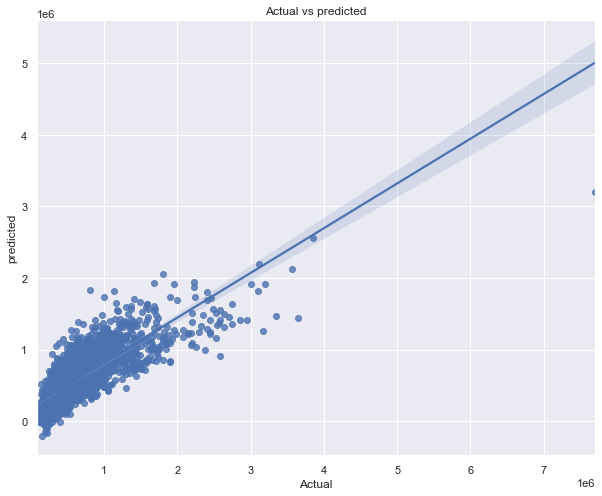

In [93]:
#prediction
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.regplot(ym_test,ym_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')

# Model 2

In [94]:
#set the features of the model
x = new_df.drop(columns = ["price",'bedrooms','sqft_lot','bathrooms'])
y = new_df["price"]

In [95]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 50)

## Model training

In [96]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [97]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x_train,y_train)

LinearRegression()

In [98]:
#display the intercept and coefficients of the OLS model
print("Intercept :" + str(OLS.intercept_))
print('the set of coefficients :' + str(OLS.coef_))
print("The R-squared values :" + str(OLS.score(x_train,y_train)))

Intercept :541232.6626327436
the set of coefficients :[ 63380.35154291 196592.53725216  80192.98530735  95272.0886996
 -44133.67951006  50606.96152035  -3638.61660321  20143.85677691
  43655.63850818   1503.89956362  -5175.72133346]
The R-squared values :0.6422214698437823


In [99]:
#predicting with OLS
y_pred = OLS.predict(x_test)
performance = pd.DataFrame({'PREDICTIONS' : y_pred, 'ACTUAL VALUES':y_test})
performance['error'] = performance['ACTUAL VALUES'] - performance['PREDICTIONS']
performance

,PREDICTIONS,ACTUAL VALUES,error
3879,451386.575290,589950.0,138563.424710
6668,517521.394318,590000.0,72478.605682
5327,364805.365142,279000.0,-85805.365142
19235,153717.509402,260000.0,106282.490598
13357,395591.643279,600000.0,204408.356721
...,...,...,...
10957,595153.976937,554729.0,-40424.976937
13397,344034.885371,269000.0,-75034.885371
20264,952928.601311,785000.0,-167928.601311
14684,398323.400356,653000.0,254676.599644


In [100]:
# preparing the data for plotting
performance.reset_index(drop =True, inplace =True)
performance.reset_index( inplace =True)
performance.head()

,index,PREDICTIONS,ACTUAL VALUES,error
0,0,451386.575290,589950.0,138563.424710
1,1,517521.394318,590000.0,72478.605682
2,2,364805.365142,279000.0,-85805.365142
3,3,153717.509402,260000.0,106282.490598
4,4,395591.643279,600000.0,204408.356721


In [101]:
#mean absolute error
performance['error'].abs().mean()
#mean_absolute_error(y_test,pred)

140765.26127680953

In [102]:
# display the intercept and coefficients of the OLS model
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
nicerOLS=sm.OLS(y_train, x_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     2641.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:52:24   Log-Likelihood:            -2.2228e+05
No. Observations:               16196   AIC:                         4.446e+05
Df Residuals:                   16184   BIC:                         4.447e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.412e+05   1735.956    311.778      0.000    5.38e+05    5.45e+05
x1          6.338e+04   1803.311     35.147      0.000    5.98e+04    6.69e+04
x2          1.966e+05   3025.635     64.976      0.000    1.91e+05    2.03e+05
x3          8.019e+04   1987.001     40.359      0.000    7.63e+04    8.41e+04
x4          9.527e+04   1775.176     53.669      0.000    9.18e+04    9.88e+04
x5         -4.413e+04   1991.228    -22.164      0.000    -4.8e+04   -4.02e+04
x6          5.061e+04   2833.720     17.859      0.000    4.51e+04    5.62e+04
x7         -3638.6166   1823.353     -1.996      0.046   -7212.591     -64.642
x8          2.014e+04   1753.262     11.489      0.000    1.67e+04    2.36e+04
x9          4.366e+04   1932.999     22.584      0.000    3.99e+04    4.74e+04
x10         1503.8996   1738.342      0.865      0.387   -1903.443    4911.242
x11        -5175.7213   2168.697     -2.387      0.017   -9426.608    -924.834
==============================================================================
Omnibus:                    12157.294   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           719527.169
Skew:                           3.067   Prob(JB):                         0.00
Kurtosis:                      35.072   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Actual vs predicted')

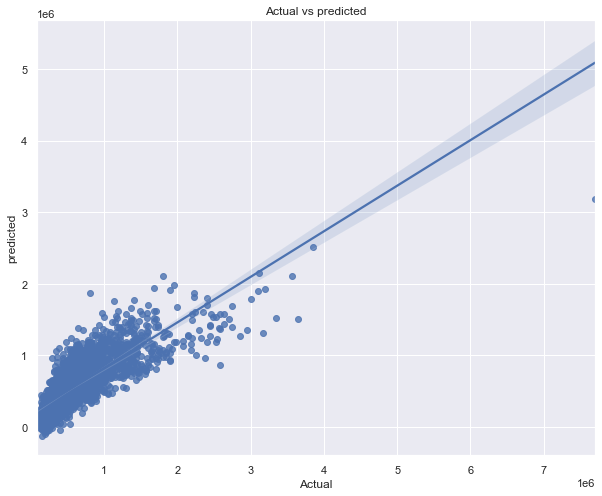

In [103]:
#prediction
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.regplot(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')

###  model 3

Dropping columns with a correlation of above 5

In [104]:
x1 = new_df.drop(columns = ['sqft_living15','bathrooms','sqft_above','price'])
y1 = new_df["price"]

In [105]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, random_state = 50)

In [106]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [107]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x1_train,y1_train)

LinearRegression()

In [108]:
#display the intercept and coefficients of the OLS model
print("Intercept :" + str(OLS.intercept_))
print('the set of coefficients :' + str(OLS.coef_))
print("The R-squared values :" + str(OLS.score(x1_train,y1_train)))

Intercept :541232.6626327445
the set of coefficients :[ 60588.36708117  26420.99473298  74448.47732455  81582.85572847
 104530.26399119  14932.98604202   3439.62653003  20654.94745817
  80640.59064602   2890.97426171  93323.75851692]
The R-squared values :0.4261309314143569


In [109]:
#predicting with OLS
y1_pred = OLS.predict(x1_test)
performance_one = pd.DataFrame({'PREDICTIONS' : y1_pred, 'ACTUAL VALUES':y1_test})
performance_one['error'] = performance_one['ACTUAL VALUES'] - performance_one['PREDICTIONS']
performance_one

,PREDICTIONS,ACTUAL VALUES,error
3879,558316.226440,589950.0,31633.773560
6668,330298.372786,590000.0,259701.627214
5327,313715.092571,279000.0,-34715.092571
19235,201971.160325,260000.0,58028.839675
13357,443730.216563,600000.0,156269.783437
...,...,...,...
10957,678199.412103,554729.0,-123470.412103
13397,394113.552104,269000.0,-125113.552104
20264,700211.581139,785000.0,84788.418861
14684,388749.541500,653000.0,264250.458500


In [110]:
# preparing the data for plotting
performance_one.reset_index(drop =True, inplace =True)
performance_one.reset_index( inplace =True)
performance_one.head()

,index,PREDICTIONS,ACTUAL VALUES,error
0,0,558316.226440,589950.0,31633.773560
1,1,330298.372786,590000.0,259701.627214
2,2,313715.092571,279000.0,-34715.092571
3,3,201971.160325,260000.0,58028.839675
4,4,443730.216563,600000.0,156269.783437


In [111]:
#mean absolute error
performance_one['error'].abs().mean()
#mean_absolute_error(y1_test,pred)

171703.44863319036

In [112]:
# display the intercept and coefficients of the OLS model
import statsmodels.api as sm
x1_train=sm.add_constant(x1_train)
nicerOLS=sm.OLS(y1_train, x1_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1093.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:52:26   Log-Likelihood:            -2.2610e+05
No. Observations:               16196   AIC:                         4.522e+05
Df Residuals:                   16184   BIC:                         4.523e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.412e+05   2198.558    246.176      0.000    5.37e+05    5.46e+05
x1          6.059e+04   2483.364     24.398      0.000    5.57e+04    6.55e+04
x2          2.642e+04   3512.612      7.522      0.000    1.95e+04    3.33e+04
x3          7.445e+04   2282.973     32.610      0.000       7e+04    7.89e+04
x4          8.158e+04   2606.747     31.297      0.000    7.65e+04    8.67e+04
x5          1.045e+05   2246.224     46.536      0.000       1e+05    1.09e+05
x6          1.493e+04   2381.119      6.271      0.000    1.03e+04    1.96e+04
x7          3439.6265   3518.235      0.978      0.328   -3456.503    1.03e+04
x8          2.065e+04   2218.256      9.311      0.000    1.63e+04     2.5e+04
x9          8.064e+04   2377.782     33.914      0.000     7.6e+04    8.53e+04
x10         2890.9743   2201.923      1.313      0.189   -1425.038    7206.986
x11         9.332e+04   2424.658     38.489      0.000    8.86e+04    9.81e+04
==============================================================================
Omnibus:                    14234.434   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1076571.984
Skew:                           3.878   Prob(JB):                         0.00
Kurtosis:                      42.181   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Actual vs predicted')

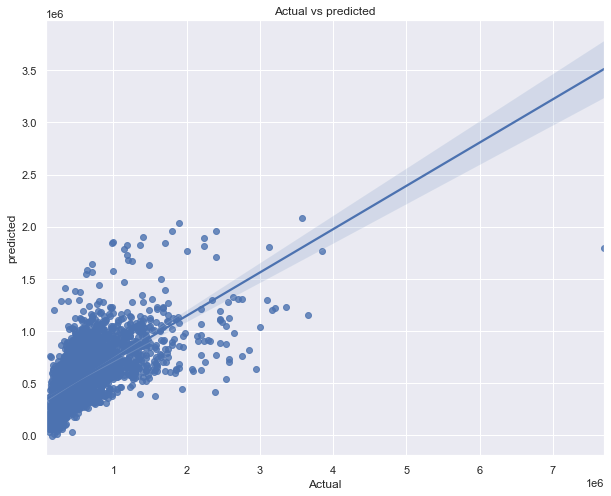

In [113]:
#prediction
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.regplot(y1_test,y1_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')

 Congratulations! You have finished the project.